In [1]:
import numpy as np
import laserhockey.hockey_env as h_env
import gymnasium as gym
from importlib import reload
from TD3_helpers import *
import time
import torch
import DDPG
import TD3
import os
import matplotlib.pyplot as plt
from tqdm import tqdm
import pickle

In [2]:
a = np.float64(10)
b = np.float32(10)
print(type(a), type(b))
print(type(a)==type(b))
print(type(b.astype(np.float64)))

<class 'numpy.float64'> <class 'numpy.float32'>
False
<class 'numpy.float64'>


In [14]:
start_config = {
    "name" : "name",
    "agent_type" : "TD3",
    "env_type" : "hockey",
    "test" : False,
    "render" : False,
    "episodes" : 1000,
    "max_steps" : int(1e5),
    "mode" : "normal",
    "eps" : 0.1,
    "discount":0.99,
    "update_target_every":100,
    "update_policy_every":2,
    "hidden_sizes_actor" : [256,256],
    "hidden_sizes_critic" : [256,256],
    "iter_fit" : 1,
    "batch_size" : 256,
    "smoothing_std"  : 0.0001,
    "smoothing_clip" : 0.0002,
    "checkpoint1" : None,
    "checkpoint2" : None,
    "learning_rate_critic": 0.001,
    "learning_rate_actor": 0.001,
    "buffer_size" : int(1e5),
    "theta" : 0.005,
    "prio_replay" : False,
    "exp_phase" : 1e3,
    "cdq" : True,
    "ou" : True,
    "retrain" : False
}

TD3


Training...: 100%|████████████████████████████████████████████████████████| 500000/500000 [8:07:20<00:00, 17.10steps/s]


Wins: 682
Losses: 913
Draws: 1297
W/L: 0.7469879518072289


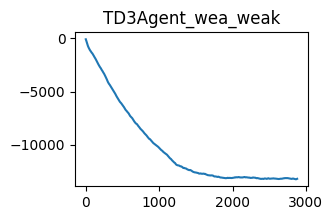

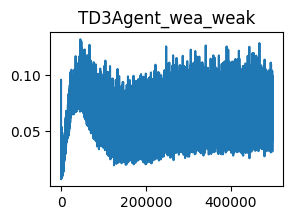

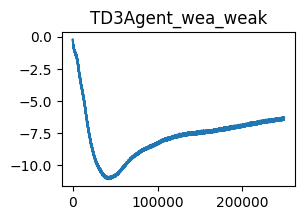

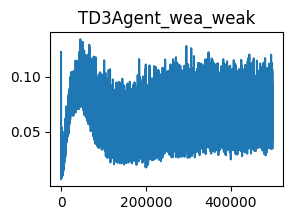

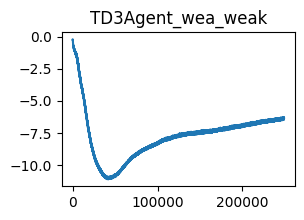

Testing...:  21%|███████████▌                                            | 207327/1000000 [01:40<06:23, 2068.04steps/s]

Wins: 294
Losses: 22
Draws: 684
W/L: 13.363636363636363


In [8]:
for agent_type in ["TD3"]:
    print(agent_type)
    config = start_config.copy()
    config["exp_phase"] = int(2e3)
    config["mode"] = "weak"
    config["agent_type"] = "TD3"
    config["max_steps"] = int(5e5)
    config["eps"] = 0.1
    config["name"] = "fixedactionscompare_more"
    config["test"] = False
    init_train(config)
    config["checkpoint1"] = f'./results/{config["agent_type"]}_hockey_{config["name"]}_{config["mode"]}_agent.pth'
    config["test"] = True
    init_train(config)

0


Training...: 100%|████████████████████████████████████████████████████████████| 50000/50000 [25:19<00:00, 32.91steps/s]


Wins: 57
Losses: 10
Draws: 170
W/L: 5.7


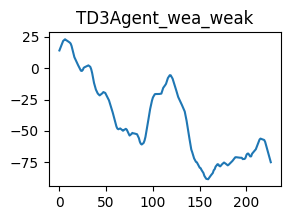

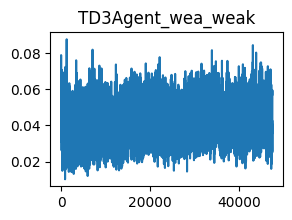

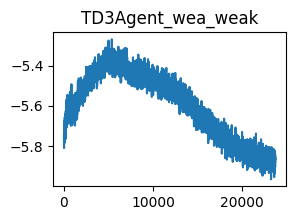

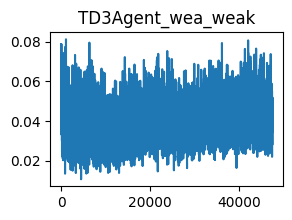

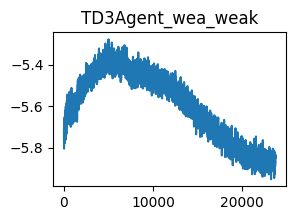

Testing...:  21%|███████████▉                                            | 213313/1000000 [01:47<06:36, 1986.37steps/s]


Wins: 248
Losses: 21
Draws: 731
W/L: 11.80952380952381
1


Training...:  46%|███████████████████████████▍                                | 22907/50000 [09:56<13:03, 34.58steps/s]

In [ ]:

config = start_config.copy()

config["name"] = "fixedactionscompare_more"
for ii in range(10):
    print(ii)
    config["retrain"] = True
    config["exp_phase"] = int(2.5e3)
    config["max_steps"] = int(5e4)
    config["learning_rate_critic"] = 0.0001
    config["learning_rate_actor"] = 0.0001
    config["mode"] = "weak"
    config["agent_type"] = "TD3"
    config["eps"] = 0.025
    config["checkpoint1"] = f'./results/{config["agent_type"]}_hockey_{config["name"]}_{config["mode"]}_agent.pth'
    config["name"] = f"fixedactionscompare_more{ii}"
    config["test"] = False
    init_train(config)
    config["checkpoint1"] = f'./results/{config["agent_type"]}_hockey_{config["name"]}_{config["mode"]}_agent.pth'
    config["test"] = True
    init_train(config)

In [ ]:
config = start_config.copy()
config["name"] = "tournament"
config["mode"] = "weak"
config["prio_replay"] = True
config["max_steps"] = int(1e6)
config["exp_phase"] = int(2e3)
config["test"] = False
init_train(config)
config["test"] = True
init_train(config)

In [17]:
config = start_config.copy()
config["mode"] = "weak"
config["name"] = "Nnoise_lowlr_prio"
config["checkpoint1"] = f'./results/{config["agent_type"]}_hockey_{config["name"]}_{config["mode"]}_agent.pth'
config["test"] = True
init_train(config)

Testing...:  10%|█████▊                                                  | 104155/1000000 [00:48<06:58, 2140.16steps/s]

Wins: 362
Losses: 458
Draws: 180
W/L: 0.7903930131004366


In [ ]:
config = start_config.copy()
name = "agent_compare_newsmooth_ou"
mode = "weak"
config["checkpoint1"] = f'./results/{config["agent_type"]}_hockey_{name}_{mode}_agent.pth'
config["name"] = "weak_normal_ou"
config["mode"] = "normal"
config["episodes"] = 500
config["learning_rate_critic"] = 0.001
config["learning_rate_actor"] = 0.001
config["test"] = True
init_train(config)
config["test"] = False
init_train(config)
config["checkpoint1"] = f'./results/{config["agent_type"]}_hockey_{config["name"]}_{config["mode"]}_agent.pth'
config["test"] = True
init_train(config)